In [1]:
import numpy as np
import pandas as pd 
import mplfinance as mpf
df = pd.read_csv("C:/Users/Kazem Kamrani/Desktop/TehranMarket/Symbol/AhromD.csv", index_col = "Date",
                 parse_dates = True,
                 na_values=['nan'])
#df = df.drop(df.index[-1])
df

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-20,10000,10000,10000,10000,490000000
2022-01-01,10000,10060,9999,10060,1990468
2022-01-02,10010,10060,10001,10019,2412421
2022-01-03,10030,10030,10000,10000,1338832
2022-01-04,10000,10002,9970,9971,3013175
...,...,...,...,...,...
2023-08-12,18900,18900,18020,18170,69249903
2023-08-13,18280,18900,18010,18820,101589543
2023-08-14,18870,19090,18190,18300,71611150


In [2]:
def calculate_ATR(data, period=14):
    # Calculate True Range (TR)
    data['High-Low'] = data['High'] - data['Low']
    data['High-PrevClose'] = abs(data['High'] - data['Close'].shift())
    data['Low-PrevClose'] = abs(data['Low'] - data['Close'].shift())
    data['TrueRange'] = data[['High-Low', 'High-PrevClose', 'Low-PrevClose']].max(axis=1)
    
    # Calculate Average True Range (ATR)
    data['ATR'] = data['TrueRange'].rolling(period).mean()
    
    # Clean up temporary columns
    data.drop(['High-Low', 'High-PrevClose', 'Low-PrevClose', 'TrueRange'], axis=1, inplace=True)
    
    return data
dfATR = calculate_ATR(df, period=14)
dfATR.tail()

,Open,High,Low,Close,Volume,ATR
Date,,,,,,
2023-08-12,18900,18900,18020,18170,69249903,757.142857
2023-08-13,18280,18900,18010,18820,101589543,737.857143
2023-08-14,18870,19090,18190,18300,71611150,756.428571
2023-08-15,18230,18370,17900,18050,62436559,727.142857
2023-08-16,18150,18300,17900,18050,33786736,700.714286


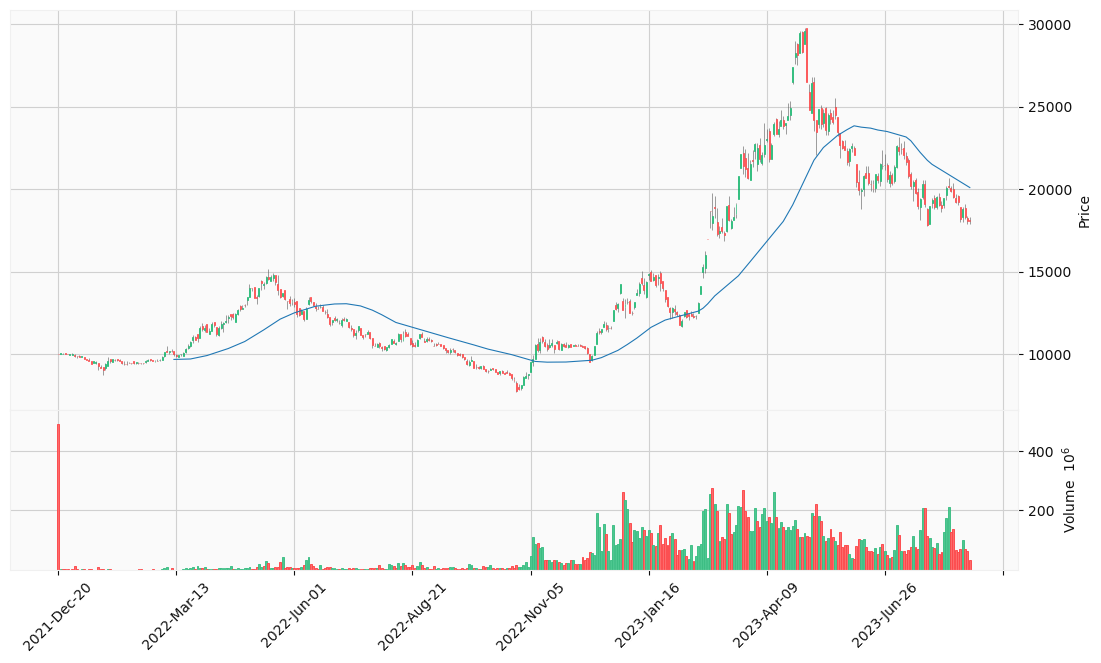

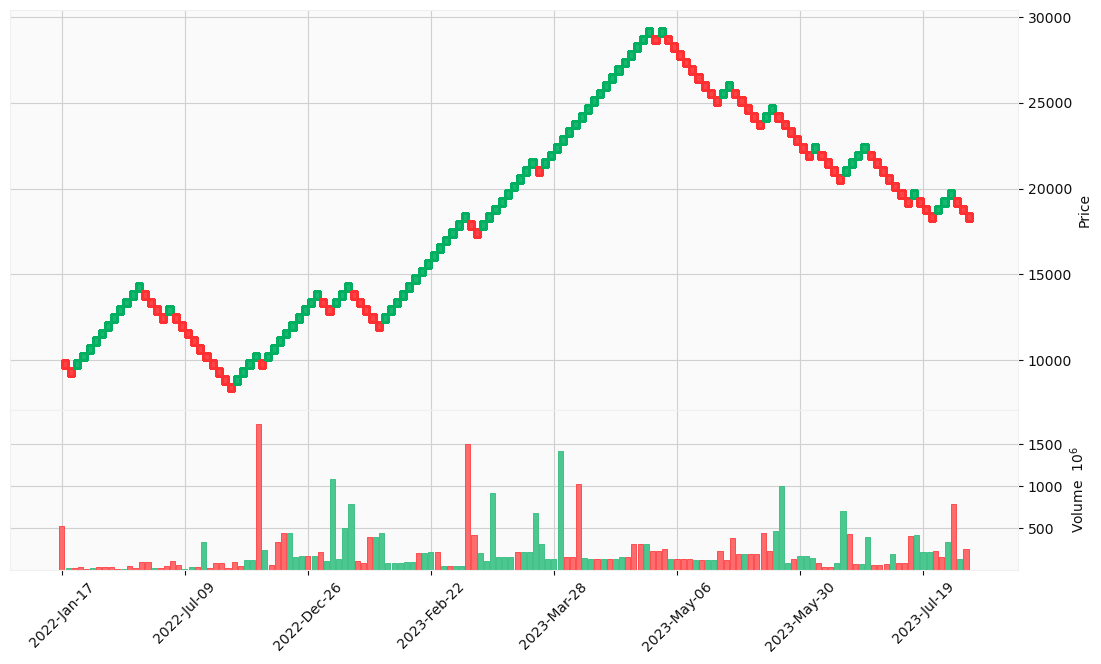

In [3]:
Ndf = df#.loc['2024-01-01':]
mpf.plot(Ndf,type="candle", volume = True, style = 'yahoo',mav=50, figsize=(14,8))
mpf.plot(Ndf,type="renko", volume = True, style = 'yahoo' , renko_params = dict(brick_size =450) , 
        figsize=(14,8))

In [ ]:
def calculate_ATR(data, period=14):
    # Calculate True Range (TR)
    data['High-Low'] = data['High'] - data['Low']
    data['High-PrevClose'] = abs(data['High'] - data['Close'].shift())
    data['Low-PrevClose'] = abs(data['Low'] - data['Close'].shift())
    data['TrueRange'] = data[['High-Low', 'High-PrevClose', 'Low-PrevClose']].max(axis=1)
    
    # Calculate Average True Range (ATR)
    data['ATR'] = data['TrueRange'].rolling(period).mean()
    
    # Clean up temporary columns
    data.drop(['High-Low', 'High-PrevClose', 'Low-PrevClose', 'TrueRange'], axis=1, inplace=True)
    
    return data

def calculate_RSI(data, period=14):
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    data['RSI'] = rsi
    
    return data

In [ ]:
Adf = calculate_RSI(df, period=14)

In [ ]:
Adf = calculate_ATR(df, period=14)

In [ ]:
Adf['MAV100'] = Adf['Volume'].rolling(window=100).mean()
Adf = Adf.dropna()
forecast_out = int(1)
Adf['PredictionClose'] = Adf['Close'].shift(-forecast_out)
Adf['PredictionHigh'] = Adf['High'].shift(-forecast_out)
Adf['PredictionLow'] = Adf['Low'].shift(-forecast_out)
Adf

In [ ]:
Adf.to_csv('AhromRD.csv', index=True)